# Kyeongho Min | KMin@scu.edu | Project #1

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import operator
import collections

The dataset of 'Vegan and Vegetarian' restaurants in the United States

In [5]:
url = 'https://query.data.world/s/r3y5oaarfglbyggbl6ixa6h74cj56o'
originaldf = pd.read_csv(url)
originaldf.head()

,address,categories,city,claimed,country,cuisines,dateOpened,dateUpdated,descriptions,facebookPageURL,...,menuURL,name,paymentTypes,phones,postalCode,priceRange,province,sic,twitter,websites
0,2871 Gulf To Bay Blvd,"American, American (new), Clearwater Restauran...",Clearwater,NaN,US,NaN,NaN,2014-02-01T04:41:06Z,"Tags: American (New), American, and Trendy Sta...",NaN,...,NaN,Village Inn Restaurant and Bakery,NaN,7277964988,33759,NaN,FL,8423,NaN,NaN
1,605 W Main St,Caf and Sandwich Place,Louisville,NaN,US,"Vegetarian, Delicatessen",NaN,2016-07-23T22:37:24Z,"Atlantic No. 5, Louisville: See 4 unbiased rev...",NaN,...,NaN,Atlantic No. 5,Yes,5028833398,40202,USD 25.00-40.00,KY,NaN,NaN,atlanticno5.com
2,3803 9th St S W,"American, Barbecue, Puyallup Restaurants, Barb...",Puyallup,NaN,US,NaN,NaN,2015-11-19T22:22:31Z,"Description: Famous Dave's is a Barbecue , Am...",NaN,...,NaN,Famous Dave's,NaN,2536040340,98373,USD 10.00 - USD 15.00,WA,5610,NaN,http://famousdaves.com
3,30 S Main St,"Coffee & Tea, Restaurant, Restaurants, Bar, Am...",Oberlin,NaN,US,"Coffee & Tea, Restaurants, American, Bar, Pu...",NaN,2016-06-20T17:47:10Z,"The Feve, Oberlin: See 170 unbiased reviews of...",NaN,...,/oberlin-oh/mip/the-feve-8940755/menu,The Feve,"mastercard, amex, discover, Yes, visa","[""4407741978"",""4197741978"",""4407753064""]",44074,USD 25.00-40.00,OH,NaN,NaN,http://www.thefeve.com
4,55 Crescent Dr,Sandwich Place and Fast Food Restaurant,Pleasant Hill,yellowpages.com,US,"Take Out Restaurants, Asian Restaurants, Resta...",NaN,2016-07-23T23:55:05Z,"[""https://www.zagat.com/r/yalla-mediterranean-...",NaN,...,/pleasant-hill-ca/mip/yalla-mediterranean-5061...,Quiznos,"master card, visa",9258258644,94523,$,CA,NaN,quiznos,http://www.yallamedi.com/


In [6]:
originaldf.shape

(18155, 29)

In [7]:
pd.set_option('display.max_columns', 100)
originaldf.head()

,address,categories,city,claimed,country,cuisines,dateOpened,dateUpdated,descriptions,facebookPageURL,features,hours,images,isClosed,key,lat,languages,long,menus,menuURL,name,paymentTypes,phones,postalCode,priceRange,province,sic,twitter,websites
0,2871 Gulf To Bay Blvd,"American, American (new), Clearwater Restauran...",Clearwater,NaN,US,NaN,NaN,2014-02-01T04:41:06Z,"Tags: American (New), American, and Trendy Sta...",NaN,NaN,NaN,NaN,NaN,us/fl/clearwater/2871gulftobayblvd,27.971165,NaN,-82.696938,"[{""descriptions"":""A combination of diced ham a...",NaN,Village Inn Restaurant and Bakery,NaN,7277964988,33759,NaN,FL,8423,NaN,NaN
1,605 W Main St,Caf and Sandwich Place,Louisville,NaN,US,"Vegetarian, Delicatessen",NaN,2016-07-23T22:37:24Z,"Atlantic No. 5, Louisville: See 4 unbiased rev...",NaN,"[{""key"":""Value Rating"",""value"":""3.5 of 5 stars...","[{""day"":""Mon - Fri"",""hour"":""7:00 AM - 4:00 PM""...",https://irs2.4sqi.net/img/general/200x200/2973...,NaN,us/ky/louisville/605wmainst,38.257020,NaN,-85.760013,"[{""descriptions"":""Mexican coke, ale 8, q soda,...",NaN,Atlantic No. 5,Yes,5028833398,40202,USD 25.00-40.00,KY,NaN,NaN,atlanticno5.com
2,3803 9th St S W,"American, Barbecue, Puyallup Restaurants, Barb...",Puyallup,NaN,US,NaN,NaN,2015-11-19T22:22:31Z,"Description: Famous Dave's is a Barbecue , Am...",NaN,NaN,NaN,NaN,NaN,us/wa/puyallup/38039thstsw/98451436,47.154828,NaN,-122.303992,"[{""descriptions"":""create your own full slab. p...",NaN,Famous Dave's,NaN,2536040340,98373,USD 10.00 - USD 15.00,WA,5610,NaN,http://famousdaves.com
3,30 S Main St,"Coffee & Tea, Restaurant, Restaurants, Bar, Am...",Oberlin,NaN,US,"Coffee & Tea, Restaurants, American, Bar, Pu...",NaN,2016-06-20T17:47:10Z,"The Feve, Oberlin: See 170 unbiased reviews of...",NaN,"[{""key"":""AKA:"",""value"":""Feve The""},{""key"":""Val...","[{""day"":""Sat - Sun"",""hour"":""9:30 am - 2:30 am""...",https://irs1.4sqi.net/img/general/200x200/1541...,NaN,us/oh/oberlin/30smainst,41.290823,NaN,-82.217640,NaN,/oberlin-oh/mip/the-feve-8940755/menu,The Feve,"mastercard, amex, discover, Yes, visa","[""4407741978"",""4197741978"",""4407753064""]",44074,USD 25.00-40.00,OH,NaN,NaN,http://www.thefeve.com
4,55 Crescent Dr,Sandwich Place and Fast Food Restaurant,Pleasant Hill,yellowpages.com,US,"Take Out Restaurants, Asian Restaurants, Resta...",NaN,2016-07-23T23:55:05Z,"[""https://www.zagat.com/r/yalla-mediterranean-...",NaN,"[{""key"":""Price Range "",""value"":""Below Average""}]","[{""day"":""Monday "",""hour"":""11:00am - 9:00pm ""},...",http://storage.googleapis.com/zgt-photos/0x808...,NaN,us/ca/pleasanthill/55crescentdr,37.945663,NaN,-122.061997,"[{""descriptions"":""greek salad and rice pilaf t...",/pleasant-hill-ca/mip/yalla-mediterranean-5061...,Quiznos,"master card, visa",9258258644,94523,$,CA,NaN,quiznos,http://www.yallamedi.com/


Select columns I am interested in

In [8]:
city_col = 'city'
province_col = 'province'
cuisines_col = 'cuisines'
name_col = 'name'
postalcode_col = 'postalCode'

In [9]:
print('Loading %s' %(url))

usecols = [city_col, province_col, cuisines_col, name_col, postalcode_col]
df = pd.read_csv(url, usecols = usecols)

#Refine the table; remove duplicate and rows which contain blank or null

df.drop_duplicates(subset = ['name'], keep = 'first', inplace = True)
df[province_col].replace(to_replace = np.nan, value = "00", inplace=True)
df[city_col].replace(np.nan, "00", inplace=True)
df = df[df.province != '00']
df = df[df.city != '00']

print('Done loading')
df.shape

Loading https://query.data.world/s/r3y5oaarfglbyggbl6ixa6h74cj56o
Done loading


(9243, 5)

In [10]:
df.head(20)

,city,cuisines,name,postalCode,province
0,Clearwater,NaN,Village Inn Restaurant and Bakery,33759,FL
1,Louisville,"Vegetarian, Delicatessen",Atlantic No. 5,40202,KY
2,Puyallup,NaN,Famous Dave's,98373,WA
3,Oberlin,"Coffee & Tea, Restaurants, American, Bar, Pu...",The Feve,44074,OH
4,Pleasant Hill,"Take Out Restaurants, Asian Restaurants, Resta...",Quiznos,94523,CA
5,Houston,"Coffee Shops, American Restaurants, Restaurant...",Hobbit Cafe,"[""77098""]",TX
6,Bridgeport,"New York Style Pizza, Pizza By The Slice, Home...",Familia Pizza,13030,NY
7,Nashville,"African, Ethiopian, Vegetarian",Lalibela Ethiopian Cuisine,37211-2212,TN
8,Orfordville,NaN,Villa Pizza (closed),53576,WI
9,Oxford,"American, Vegetarian, Healthy",The Pita Pit,38655-3201,MS


In [11]:
print('Cities:')
print(df[city_col].unique())

Cities:
['Clearwater' 'Louisville' 'Puyallup' ... 'Poplar Bluff' 'Pflugerville'
 'W St Paul']


In [12]:
print('Province:')
print(df[province_col].unique())

Province:
['FL' 'KY' 'WA' 'OH' 'CA' 'TX' 'NY' 'TN' 'WI' 'MS' 'IL' 'IN' 'MA' 'NE'
 'GA' 'MN' 'CT' 'UT' 'OK' 'ME' 'VA' 'MI' 'NC' 'PA' 'AZ' 'LA' 'NJ' 'WY'
 'NV' 'NH' 'OR' 'IA' 'ND' 'AL' 'VT' 'AR' 'MO' 'CO' 'MT' 'HI' 'ID' 'MD'
 'WV' 'SC' 'AK' 'NM' 'KS' 'DC' 'SD' 'RI' 'AU-WA' 'DE']


In [13]:
# Let's see which states do not have vegetarian/vegan restaurants

df_province_list = list(df[province_col].unique())

# states data from <https://gist.github.com/JeffPaine/3083347>
usstates = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

DNH_state_list = []

for state in usstates:
    if state not in df_province_list:
        DNH_state_list.append(state)
        
print(DNH_state_list)

[]


1. Let's see which state in the US has the most vegetarian/vegan restaurants

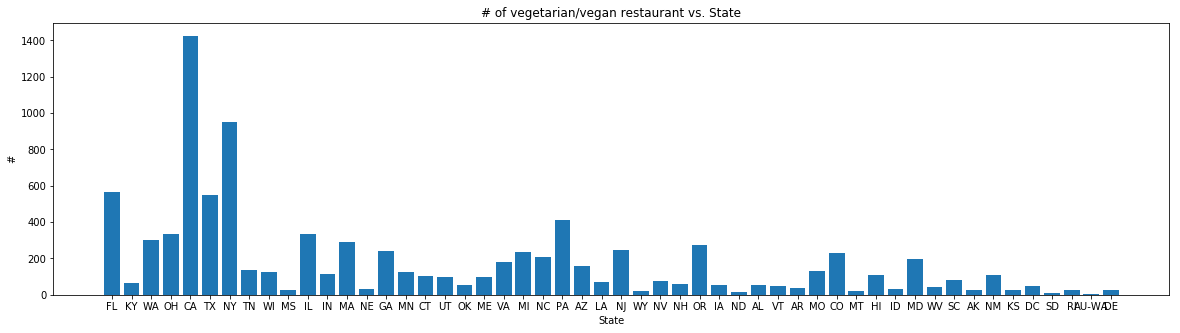

In [11]:
df_province_list = list(df[province_col].unique())

# each state(province) has a corresponding count

count_list = []

for state in df_province_list:
    state_count = np.sum(df[province_col] == state)
    count_list.append(state_count)
    
# Let's create a single graph

plt.figure(figsize = (20,5))

plt.bar(df_province_list, count_list, width = 0.8, align = 'center')

plt.title('# of vegetarian/vegan restaurant vs. State')
plt.xlabel('State')
plt.ylabel('#')

plt.show()

We can see California has the most vegetarian/vegan restaurants in the US!


Let's see how many vegetarian/vegan restaurants there are in California

In [12]:
match_df = df[(df[province_col] == 'CA')]
match_df

,city,cuisines,name,postalCode,province
4,Pleasant Hill,"Take Out Restaurants, Asian Restaurants, Resta...",Quiznos,94523,CA
20,Beverly Hills,Vegetarian,A Votre Sante,90212-3805,CA
29,El Dorado Hills,"American, Hot Dogs, Sandwiches, Vegetarian, De...",Burger Hut El Dorado Hills,95762,CA
36,San Francisco,"Vegetarian Restaurants, Take Out Restaurants, ...",Alive,94123,CA
56,Los Angeles,"Pizza, Desserts, Vegan, Vegetarian-Friendly, K...",Basil &berry (closed),90035,CA
57,Tustin,"Restaurants, Coffee Shops, Vegan Restaurants, ...",Freesoulcaffe,92780,CA
60,Irvine,"Thai Restaurants, Vegetarian Restaurants, Chin...",Wheel of Life,92604,CA
66,Los Angeles,"Fast Food , Health , Organic , Smoothies , Veg...",Jamba Juice,90089,CA
82,Rosemead,"Asian , Chinese , Vegan , Vegetarian",New Happy Family Restaurant,91770,CA
88,Los Angeles,"Health , Organic , Vegan , Vegetarian , Specia...",Taste of The Goddess Cafe,90036-2502,CA


2. Let's find out top vegetarian/vegan-friendly cities in the California

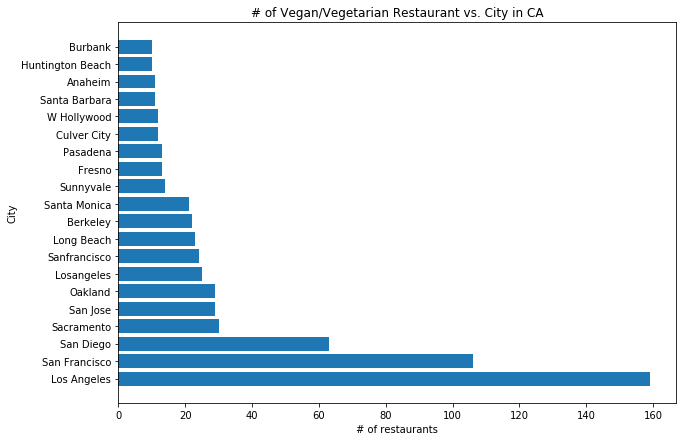

In [13]:
df_city_list = list(match_df[city_col].unique())   # city list in CA

count_list2 = {}

for city in df_city_list:
    city_count = np.sum(match_df[city_col] == city)
    count_list2[city] = city_count

# Set cities in order of the number of vegeratian/vegan restaurants
sorted_d = sorted(count_list2.items(), key = lambda x: x[1])
dd = collections.OrderedDict(sorted_d)

how_many_cities = 20  # Let's see top 20 veg-friendly cities

vg_city = list(dd.items())
top_vg_city = []

for i in range(how_many_cities):
    top_vg_city.append(vg_city[len(vg_city)-1-i])   # top_vg_city is a list of list of city and the number of restautant
    
vg_city_list = []
vg_city_count = []

for count in top_vg_city:
    vg_city_list.append(count[0])
    vg_city_count.append(count[1])
    
    
# Let's create a single graph    
plt.figure(figsize=(10,7))

plt.barh(vg_city_list,vg_city_count)

plt.title('# of Vegan/Vegetarian Restaurant vs. City in CA')
plt.xlabel('# of restaurants')
plt.ylabel('City')

plt.show()

3. Let's find out veg-restaurant near me

In [23]:
userpostal = input('Enter the postal code(5 digit) you live in: ')


# Search column containing string of userchoice
my_df = df[df[postalcode_col].str.contains(userpostal, na = False)]

my_df

Enter the postal code(5 digit) you live in: 9310


,city,cuisines,name,postalCode,province
953,Santa Barbara,Vegan,Backyard Bowls,93105-3160,CA
1135,Santa Barbara,"American Regional, Asian, Continental, Dessert...",Omni Catering,93101,CA
5771,Santa Barbara,NaN,Boochies,93101,CA
6711,Santa Barbara,Vegetarian,Boochies - Closed,93101,CA
10132,Santa Barbara,NaN,Epic Bowl,93101,CA
10676,Santa Barbara,"American, Italian, Seafood, Vegetarian, Soups",Bistro 1111 - Closed,93103,CA
11000,Santa Barbara,NaN,Culture Shock,93101,CA
13768,Santa Barbara,"Restaurants, Italian, European, Vegetarian, Co...",Pizza Guru,93105,CA
14580,Santa Barbara,"American, Seafood, Vegetarian, Californian",Santa Ynez Vineyards,93101,CA
15545,Santa Barbara,NaN,Mesa Verde Restaurant,93109,CA


In [27]:
userpostal = input('Enter the postal code(5 digit) you live in: ')


# Search column containing string of userchoice
my_df = df[df.postalCode.apply(lambda s: True if userpostal in str(s) else False)]
my_df

Enter the postal code(5 digit) you live in: 10001


,city,cuisines,name,postalCode,province
155,New York,"American Regional, Asian, Continental, Dessert...",David Josephs Catering,10001,NY
1023,New York,NaN,Pita Grill,10001,NY
2686,New York,NaN,Fresh & Co,10001,NY
5854,New York,"American Restaurants, Coffee Shops, Coffee & E...",Skylight Diner,10001,NY
7280,New York,NaN,Juice Press At Macy's,10001,NY
13667,New York,NaN,Bombay Sandwich Co.,"[""10001""]",NY
13683,New York,NaN,Minar Indian Restaurant,10001-4414,NY
14737,New York,NaN,Supermac,10001-5005,NY
15301,New York,"Chinese, Vegetarian-Friendly",Urban Kitchen,10001,NY
15708,New York,"Korean Restaurants, Asian Restaurants, Restaur...",Sunsweet Market Inc,10001,NY
